In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
plt.style.use('fivethirtyeight') 

In [3]:
df = pd.read_csv("data/merged_dataset.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,map_id,AirportCode,AirportName,Latitude,Longitude
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,98178,47.511,-122.257,1340,5650,"47.5112, -122.257",NaN,NaN,NaN,NaN
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,98125,47.721,-122.319,1690,7639,"47.721, -122.319",NaN,NaN,NaN,NaN
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,98028,47.738,-122.233,2720,8062,"47.7379, -122.233",NaN,NaN,NaN,NaN
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,98136,47.521,-122.393,1360,5000,"47.5208, -122.393",NaN,NaN,NaN,NaN
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,98074,47.617,-122.045,1800,7503,"47.6168, -122.045",NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.isnull().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront        2376
view                63
condition            0
grade                0
sqft_above           0
sqft_basement      454
yr_built             0
yr_renovated      3842
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
map_id               0
AirportCode      21597
AirportName      21597
Latitude         21597
Longitude        21597
dtype: int64

In [6]:
df.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,map_id,AirportCode,AirportName,Latitude,Longitude


In [7]:
df['floors'].value_counts()


floors
1.000    10673
2.000     8235
1.500     1910
3.000      611
2.500      161
3.500        7
Name: count, dtype: int64

In [8]:
df['floors'].value_counts().to_frame()


,count
floors,
1.000,10673
2.000,8235
1.500,1910
3.000,611
2.500,161
3.500,7


In [10]:
df['sqft_basement'] = df['sqft_basement'].replace('?', np.nan)


In [11]:
df = df.drop_duplicates()


In [12]:
center_latitude_threshold = df['lat'].mean()
center_latitude_threshold

47.56009299439737

In [14]:
# Define a latitude threshold to distinguish between center and outskirts
center_latitude_threshold = 47.6

# Create a new column 'location' based on latitude
df['location'] = np.where(df['lat'] >= center_latitude_threshold, 'center', 'outskirts')

# Count the number of houses in each category
location_counts = df['location'].value_counts()

# Display the results
print("Number of houses in the center:", location_counts['center'])
print("Number of houses in the outskirts:", location_counts['outskirts'])


Number of houses in the center: 9468
Number of houses in the outskirts: 12129


Correlation Matrix:
               sqft_living15  price
sqft_living15          1.000  0.585
price                  0.585  1.000


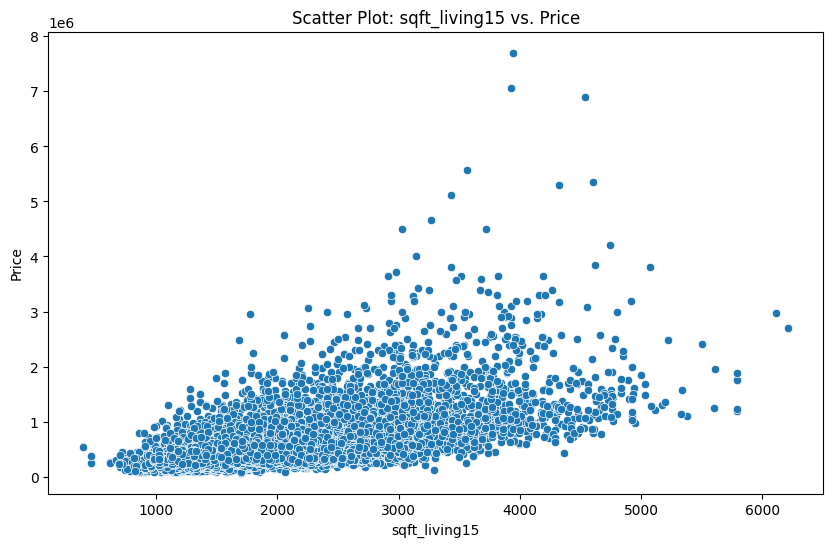

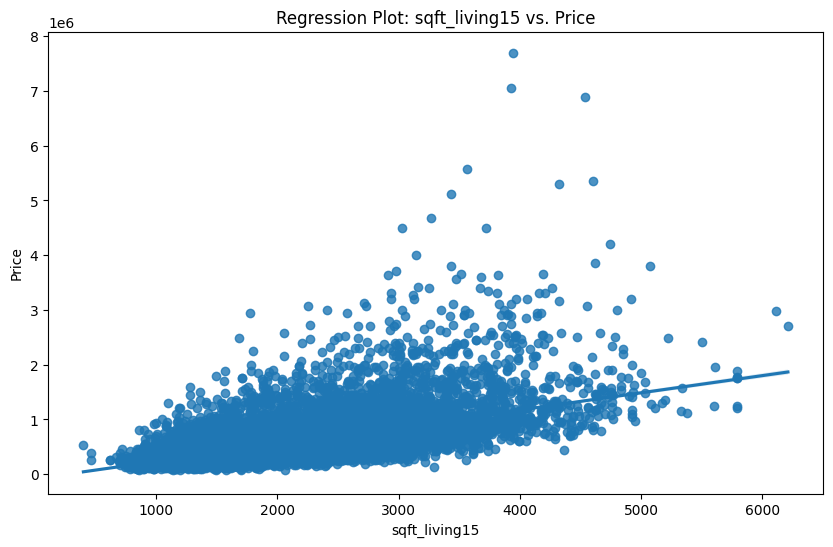

In [15]:

# Correlation Analysis
correlation = df[['sqft_living15', 'price']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation)

# Visualization: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living15', y='price', data=df)
plt.title('Scatter Plot: sqft_living15 vs. Price')
plt.xlabel('sqft_living15')
plt.ylabel('Price')
plt.show()

# Visualization: Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_living15', y='price', data=df)
plt.title('Regression Plot: sqft_living15 vs. Price')
plt.xlabel('sqft_living15')
plt.ylabel('Price')
plt.show()


In [16]:
# Filter data for houses with waterfront
waterfront_houses = df[df['waterfront'] == 1]

# Select the top 10% of real estate with waterfront based on 'price'
top_10_percent_waterfront = waterfront_houses.nlargest(int(0.10 * len(waterfront_houses)), 'price')

# Display the top 10% of real estate with waterfront
print("Top 10% of real estate with waterfront:")
print(top_10_percent_waterfront)

Top 10% of real estate with waterfront:
               id        date       price  bedrooms  bathrooms  sqft_living  \
3910   9808700762   6/11/2014 7060000.000         5      4.500        10040   
1313   7558700030   4/13/2015 5300000.000         6      6.000         7390   
1162   1247600105  10/20/2014 5110000.000         5      5.250         8010   
8085   1924059029   6/17/2014 4670000.000         5      6.750         9640   
2624   7738500731   8/15/2014 4500000.000         5      5.500         6640   
2083   8106100105  11/14/2014 3850000.000         4      4.250         5770   
6502   4217402115   4/21/2015 3650000.000         6      4.750         5480   
15241  2425049063   9/11/2014 3640000.000         4      3.250         4830   
2862   4114601570  11/18/2014 3600000.000         3      3.250         5020   
21560  9253900271    1/7/2015 3570000.000         5      4.500         4850   
7982   9362000040   6/23/2014 3400000.000         3      4.500         5230   
13954  31260

In [18]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'map_id', 'AirportCode',
       'AirportName', 'Latitude', 'Longitude', 'location'],
      dtype='object')

In [19]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,map_id,AirportCode,AirportName,Latitude,Longitude,location
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,47.511,-122.257,1340,5650,"47.5112, -122.257",NaN,NaN,NaN,NaN,outskirts
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,47.721,-122.319,1690,7639,"47.721, -122.319",NaN,NaN,NaN,NaN,center


In [20]:
# Create a DataFrame with airport data
airport_data = pd.DataFrame({
    'AirportCode': ['RMA', 'KCH', 'BFI', 'KCI'],
    'AirportName': ['Renton Municipal Airport', 'King County International Airport Airpark Hangars', 'Modern Aviation BFI', 'King County International Airport'],
    'Latitude': [47.49573695291879, 47.520983034945, 47.53199570159451, 47.537612202610134],
    'Longitude': [-122.21797540953877, -122.29850128864334, -122.29476380058364, -122.30379403684303]
})

# Convert 'zipcode' to string
df['zipcode'] = df['zipcode'].astype(str)

# Merge the datasets based on the common identifier (zipcode in this example)
df = pd.merge(df, airport_data, left_on='zipcode', right_on='AirportCode', how='left')

# Save the merged DataFrame to a new CSV file
df.to_csv('merged_dataset.csv', index=False)
